## Objective
The Olympic Committee of the USA recognizes the critical role of data analytics in augmenting its medal
winning prospects in global competitions. Amidst fierce international competition, nations are constantly 
refining their approaches across various sports. To stay competitive, it is imperative to implement a 
comprehensive data analytics initiative aimed at enhancing our athletes' training methodologies, strategic 
decision-making, and overall performance.


In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Task 1: Load 'althlete_events.csv' file and preview it

#### Data:
- Source: https://www.kaggle.com/code/mateoiglesias/olympic-games/input
- 120 Years of Olympic History:  dataset on Kaggle is a comprehensive dataset that includes information about athletes and their performances in the Olympic Games from the first modern Olympics in 1896 up to 2016. 

In [56]:
df= pd.read_csv('athlete_events.csv')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Task 2 Data Subsetting 
*select columns that provide the most insightful information for an effective exploratory data analysis (EDA)*

In [60]:
# Selecting key columns for EDA
key_columns = [
    "ID", "Name", "Sex", "Age",
    "Height", "Weight", "Team", "Year","NOC",
    "Season", "City", "Sport", "Event", "Medal"
]

# Extracting the key columns
df_key= df[key_columns]
df_key.head()


,ID,Name,Sex,Age,Height,Weight,Team,Year,NOC,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,DEN,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,NED,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Task 3: Preprocessing Steps
* Data Cleaning by handling missing values 

In [64]:
#Display the count of missing values
print(df_key.isnull().sum())
display(df_key.head())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
Year           0
NOC            0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


,ID,Name,Sex,Age,Height,Weight,Team,Year,NOC,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,DEN,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,NED,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [65]:
# Create a new df to avoid modifying the original one
dfo= df_key.copy()


#Impute age, height and weight based on the mean number
dfo['Age'].fillna(dfo['Age'].mean(),inplace=True)
dfo['Height'].fillna(dfo['Height'].mean(),inplace=True)
dfo['Weight'].fillna(dfo['Weight'].mean(),inplace=True)


#Imputation medal with a placeholder
dfo['Medal'].fillna('No Medal', inplace=True)


# Display the count of missing values
print(dfo.isnull().sum())
display(dfo.head())



ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
Year      0
NOC       0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


,ID,Name,Sex,Age,Height,Weight,Team,Year,NOC,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,1992,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,2012,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,1920,DEN,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,1900,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,1988,NED,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


In [102]:
# Removing duplicate rows, if any
print('total duplicates:',dfo.duplicated().sum())
dfo.drop_duplicates(inplace=True)



total duplicates: 0


### Task 4: Basic Information about the dataset
* The shape of the dataset (number of rows and columns)
* Data types of each column
* A summary of the dataset's statistical properties

In [128]:
#structure and characteristics of the dateframe

print(dfo.info())

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     269731 non-null  float64
 4   Height  269731 non-null  float64
 5   Weight  269731 non-null  float64
 6   Team    269731 non-null  object 
 7   Year    269731 non-null  int64  
 8   NOC     269731 non-null  object 
 9   Season  269731 non-null  object 
 10  City    269731 non-null  object 
 11  Sport   269731 non-null  object 
 12  Event   269731 non-null  object 
 13  Medal   269731 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 30.9+ MB
None


In [149]:
# data types of each column 
dataset_shape= dfo.shape
data_types= dfo.dtypes

#A summary of the dataset's statistical properties
statistical_summary= dfo.describe()

#A comprehensive summary of the dataset's properties
comprehensive_summary = dfo.describe(include='all')


print('Data Shape:\n', dataset_shape)
print('.'*30)

print('Data Tyape:\n', data_types)
print('.'*30)

print('Statistical Summary:')
display(statistical_summary)
print('.'*30)

print('comprehensive_summary :')
display(comprehensive_summary )



Data Shape:
 (269731, 14)
..............................
Data Tyape:
 ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
Year        int64
NOC        object
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object
..............................
Statistical Summary:


,ID,Age,Height,Weight,Year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.458303,175.338957,70.701918,1978.623073
std,39026.253843,6.056530,9.301313,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338970,70.702393,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


..............................
comprehensive_summary :


,ID,Name,Sex,Age,Height,Weight,Team,Year,NOC,Season,City,Sport,Event,Medal
count,269731.000000,269731,269731,269731.000000,269731.000000,269731.000000,269731,269731.000000,269731,269731,269731,269731,269731,269731
unique,NaN,134732,2,NaN,NaN,NaN,1184,NaN,230,2,42,66,765,4
top,NaN,Heikki Ilmari Savolainen,M,NaN,NaN,NaN,United States,NaN,USA,Summer,London,Athletics,Football Men's Football,No Medal
freq,NaN,39,195353,NaN,NaN,NaN,17598,NaN,18604,221167,22297,38624,5733,229959
mean,68264.949591,NaN,NaN,25.458303,175.338957,70.701918,NaN,1978.623073,NaN,NaN,NaN,NaN,NaN,NaN
std,39026.253843,NaN,NaN,6.056530,9.301313,12.606697,NaN,29.752055,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,34655.500000,NaN,NaN,22.000000,170.000000,63.000000,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,68233.000000,NaN,NaN,25.000000,175.338970,70.702393,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,102111.000000,NaN,NaN,28.000000,180.000000,76.000000,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Task 5: Data Preparation
* Outlier Treatment using IQR method

In [133]:
# Selecting the numerical columns of interest
n_cols= ['Age','Weight','Height']	

# Applying IQR method
Q1= dfo[n_cols].quantile(0.25)
Q3= dfo[n_cols].quantile(0.75)
IQR=Q3-Q1


# calculate the lower and upper bounds 
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR

print('Lower Bound:\n', lower_bound)
print('.' * 30)
print('Upper Bound:\n', upper_bound)
print('.' * 30)



# Check: Identifying outliers using IQR for capping 
outlier_condition = (dfo[n_cols] < lower_bound) | (dfo[n_cols] > upper_bound)
print('Percent of Total as Outliers by Column:')
outlier_condition.sum()/df.shape[0]*100    


Lower Bound:
 Age        13.0
Weight     43.5
Height    155.0
dtype: float64
..............................
Upper Bound:
 Age        37.0
Weight     95.5
Height    195.0
dtype: float64
..............................
Percent of Total as Outliers by Column:


Age       4.079066
Weight    4.534590
Height    3.883578
dtype: float64

In [135]:
dfo[n_cols].min()

Age        10.0
Weight     25.0
Height    127.0
dtype: float64

In [137]:
dfo[n_cols].max()

Age        97.0
Weight    214.0
Height    226.0
dtype: float64

## Task 6: Explore the data visually


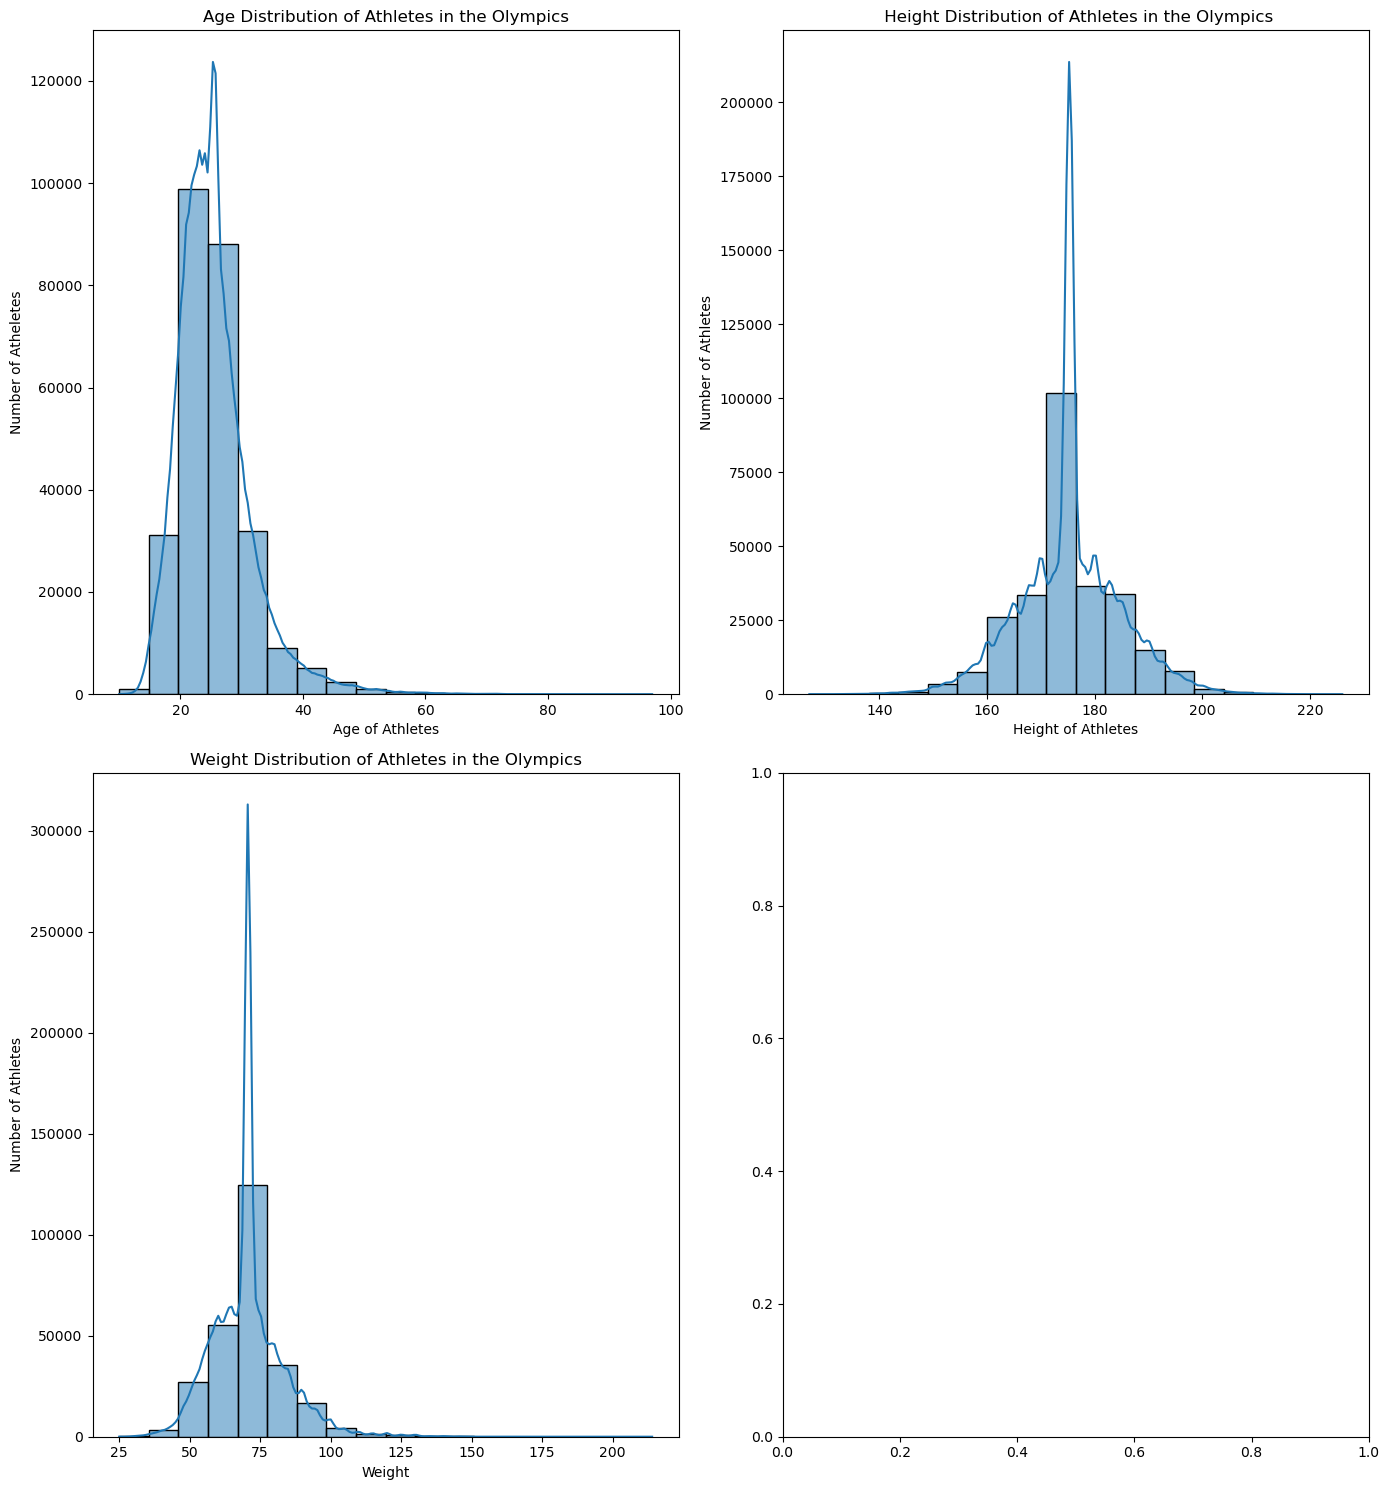

In [141]:
# Creating histograms for following key distributions 
fig, axes= plt. subplots(2,2, figsize=(14,15))

# Plot for Age
sns.histplot(dfo['Age'], bins=18, ax=axes[0,0], kde=True)
axes[0,0].set_title('Age Distribution of Athletes in the Olympics')
axes[0,0].set_xlabel('Age of Athletes')
axes[0,0].set_ylabel('Number of Atheletes')

# Plot for Height
sns.histplot(dfo['Height'],bins=18, ax=axes[0,1], kde=True)
axes[0,1].set_title(' Height Distribution of Athletes in the Olympics')
axes[0,1].set_xlabel('Height of Athletes')
axes[0,1].set_ylabel('Number of Athletes')

# Plot for Weight
sns.histplot(dfo['Weight'],bins=18, ax=axes[1,0], kde=True)
axes[1,0].set_title('Weight Distribution of Athletes in the Olympics')
axes[1,0].set_xlabel('Weight')
axes[1,0].set_ylabel('Number of Athletes')


# Adjusting layout
plt.tight_layout()
plt.show()

In [142]:
dfo[n_cols].corr()

,Age,Weight,Height
Age,1.000000,0.168071,0.111115
Weight,0.168071,1.000000,0.786635
Height,0.111115,0.786635,1.000000


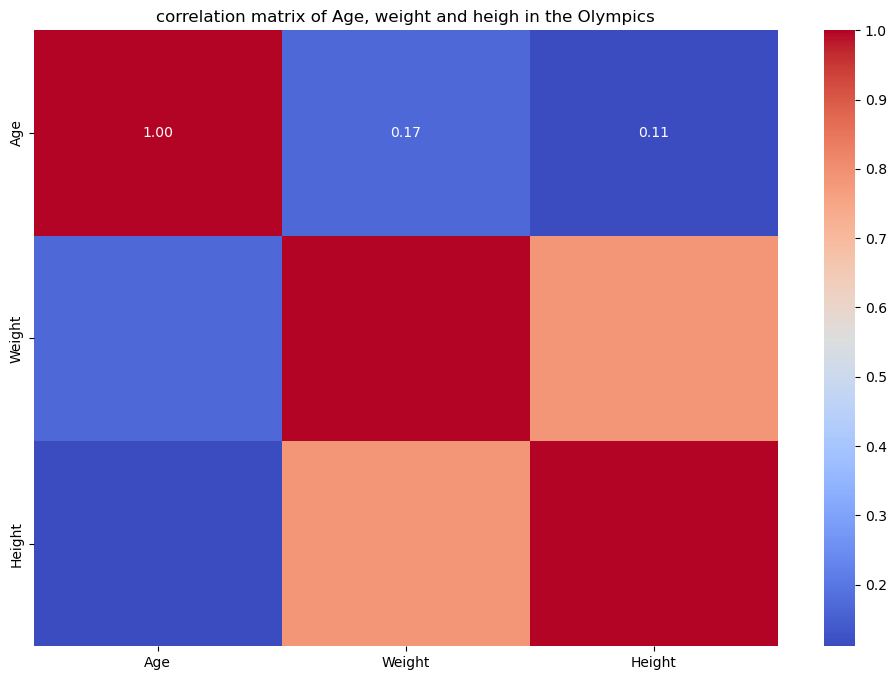

In [144]:
#correlation matrix heatmap

plt.figure(figsize=(12,8))
correlation_matrix=dfo[n_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation matrix of Age, weight and heigh in the Olympics')
plt.show()



## Task 7 Save cleaned dataframe
- Explore data further in Tableau 

In [96]:
dfo.to_csv('clean_olympic_data.csv')